# Logistic Regression

Logistic regression serves as a fundamental building block for understanding neural networks. Imagine logistic regression as the "tiny seed" from which the vast tree of neural networks grows.

At its core, logistic regression is a binary classification algorithm that predicts the probability of a binary outcome based on one or more predictor variables. It models the relationship between the independent variables and the probability of a particular outcome using the logistic function.

To understand logistic regression, let's go quickly over linear regression.

## Linear Regresssion

<img src='images\linear regression.jpg' width='500px'>

Simple linear regression estimates how much Y will change when X changes by a
certain amount. With the correlation coefficient, the variables X and Y are inter‐
changeable. With regression, we are trying to predict the Y variable from X using a
linear relationship (i.e., a line):

$$ y = b_{1}x+b_{0}$$

The term $b_{0}$ represents the intercept (or constant), while $b_{1}$ signifies the slope for variable $X$. In R output, both are referred to as coefficients, although in broader contexts, "coefficient" typically refers specifically to $b_{1}$. The variable Y is termed the response or dependent variable because it relies on $X$. Conversely, $X$ is labeled the predictor or independent variable. In the realm of machine learning, alternative terms are used; $Y$ is often referred to as the target, while $X$ is termed a feature vector.

<img src='images\weights and biases.gif' width='500px'>

If $X$ had more features $[x_1, x_2, x_3]$, the equation will become: 

$$ y = b_{3}x_{3}+b_{2}x_{2}+b_{1}x_{1}+b_{0} $$

We can represent this equation as a mutlitplication of vectors. $Y = W \cdot X + b$, where Y, W, X are all column vectors

<div style="font-size:12px; border: 2px solid black; margin: 20px; padding: 20px;">

So in linear regression you will fit the parameters $(w,b)$ to your dataset.

- The model function for linear regression, which is a function that maps from `x` to `y` is represented as
    $$f_{w,b}(x) = wx + b$$

- To train a linear regression model, you want to find the best $(w,b)$ parameters that fit your dataset.  

    - To compare how one choice of $(w,b)$ is better or worse than another choice, you can evaluate it we use a pefrormance metric, we call that a cost function $J(w,b)$
      - $J$ is a function of $(w,b)$. That is, the value of the cost $J(w,b)$ depends on the value of $(w,b)$.
  
    - The choice of $(w,b)$ that fits your data the best is the one that has the smallest cost $J(w,b)$.


- To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, you can use a method called **gradient descent**. 
  - With each step of gradient descent, your parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.
  

- The trained linear regression model can then take the input feature $x$ and output a prediction $f_{w,b}(x)$
  
</div>

<img src='images\linear reg chart.png' height='300px'>


### Gradient Descent

A gradient typically refers to the rate of change of a quantity with respect to another. In mathematics, particularly in calculus, it often refers to the slope of a function.

In the context of multivariable calculus, the gradient of a scalar field (a function that assigns a scalar value to each point in space) is a vector field that points in the direction of the greatest rate of increase of the function at each point.

<img src='images\gradient descent arrows.jpg' height='400px'>

Gradient descent involves repeated steps to adjust the value of your parameter $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, we will monitor the progress by computing the cost $J(w,b)$ as $(w,b)$
- Then using the following equations we will update the values of $(w,b)$ until we converge to the smallest cost or we reach the maximum number of iteration:
  
  $$ b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \\[10pt]
   w := w -  \alpha \frac{\partial J(w,b)}{\partial w} $$

where

  1. $\frac{\partial J(w,b)}{\partial b} $ is called the gradient of $b$

  2. $\frac{\partial J(w,b)}{\partial w} $ is called the gradient of $w$

  3. $\alpha$ is called the learning rate

#### Learning Rate

Learning rate (also referred to as step size or the alpha) is the size of the steps that are taken to reach the minimum. This is typically a small value, and it is evaluated and updated based on the behavior of the cost function. High learning rates result in larger steps but risks overshooting the minimum. Conversely, a low learning rate has small step sizes. While it has the advantage of more precision, the number of iterations compromises overall efficiency as this takes more time and computations to reach the minimum.

<img src="images/sgd.gif" style="width:400;height:400;"> <img src="images/sgd_bad.gif" style="width:400;height:400;">
<caption><center><b>Figure 2</b>: The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging). Images courtesy of Adam Harley.</font></center></caption>

#### Cost function
The cost function for linear regression $J(w,b)$ for one variable x is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- $f_{w,b}(x^{(i)})$ is the model's prediction , as opposed to $y^{(i)}$, which is the actual record. (another notation is $\hat{y}$)
- $m$ is the number of training examples in the dataset

#### Gradients

In our case, for linear regression, the gradients can be calculated the following rules:
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$


The cost function of linear regression looks like the following figure:

<img src='images\gradient_descent linear regression.png' height='500px'>

#### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$


## Logistic Regression

Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

Note: an epoch is an iteration

<img src='images\logistic regression.gif' width='500px'>

The logistic regression is given by the equations:

$$ \hat{p} = h_{\theta}(x) = \sigma (\mathbf{w} \cdot \mathbf{x} + b) $$

where, both $w$ & $x$ are column vectors and:

$$ \sigma(t) = \frac{1}{1 + \exp^{-t}} $$

The final prediction
$$
\text{Predicted label} = \hat{y} = \begin{cases}
    1 & \text{if } \hat{p} \geq 0.5 \\
    0 & \text{otherwise}
\end{cases}
$$

<img src='images\sigmoid.png' width='500px'>

### Cost function

As we said, we are trying to make a prediction between 2 classes, so our objective is different than linear regression. With every new objective comes a new cost function. In this case we use a cost function called binary cross-entropy:

$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})$$

$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$

The gradients will become:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

- Vector A is the list of all predictions for the given dataset: $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- Vector Y is the list of all true labels for the given datset: $Y = (y^{(1)}, y^{(2)}, ..., y^{(m-1)}, y^{(m)})$

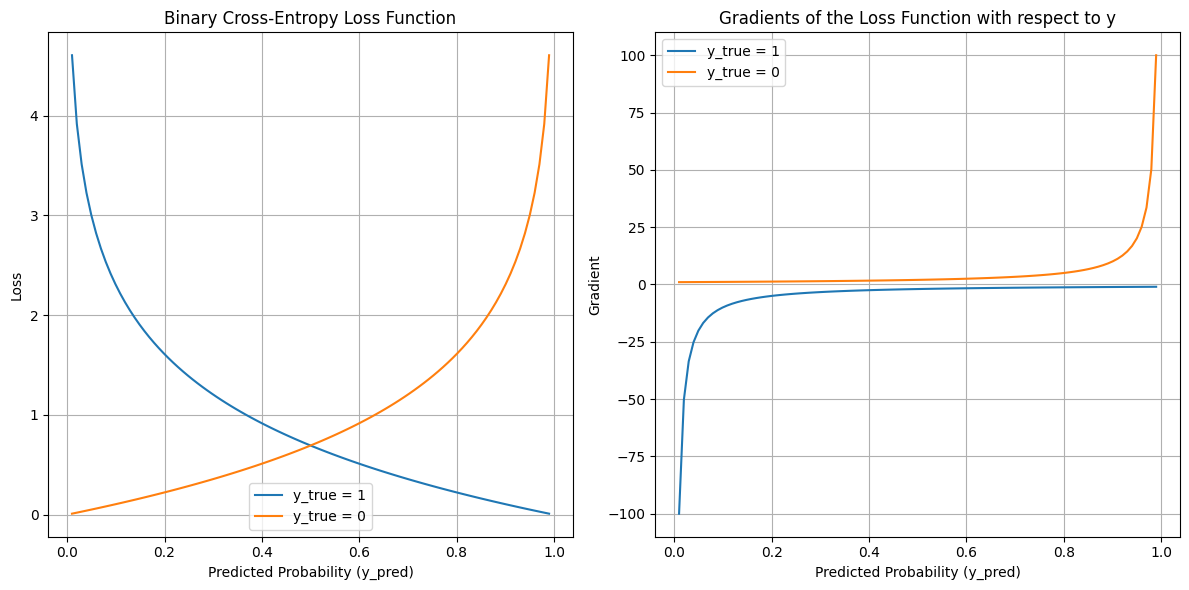

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_loss(y_true, y_pred):
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Define the gradient of the logistic loss function
def logistic_loss_gradient(y_true, y_pred):
    return (y_pred - y_true) / (y_pred * (1 - y_pred))

y_pred = np.linspace(0.01, 0.99, 100)

loss_y1 = logistic_loss(1, y_pred)
loss_y0 = logistic_loss(0, y_pred)

gradient_y1 = logistic_loss_gradient(1, y_pred)
gradient_y0 = logistic_loss_gradient(0, y_pred)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(y_pred, loss_y1, label='y_true = 1')
plt.plot(y_pred, loss_y0, label='y_true = 0')
plt.title('Binary Cross-Entropy Loss Function')
plt.xlabel('Predicted Probability (y_pred)')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot gradients
plt.subplot(1, 2, 2)
plt.plot(y_pred, gradient_y1, label='y_true = 1')
plt.plot(y_pred, gradient_y0, label='y_true = 0')
plt.title('Gradients of the Loss Function with respect to y')
plt.xlabel('Predicted Probability (y_pred)')
plt.ylabel('Gradient')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


<p style="font-size:16px; border: 2px solid black; margin: 20px; padding: 20px;">
Now let's apply all that we learned to build a logistic regression model !!

## Code

## Import Packages

In [3]:
import numpy as np
import copy
import h5py
import matplotlib.pyplot as plt

## Load Dataset

In [4]:
def load_dataset():
    train_dataset = h5py.File('data/train_catvnoncat.h5', "r")
    
    print(train_dataset.keys())
    
    train_set_x_orig = np.array(train_dataset["train_set_x"]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"]) # your train set labels
    print('train_set_x_orig', train_set_x_orig.shape)
    print('train_set_y_orig', train_set_y_orig.shape)
    

    test_dataset = h5py.File('data/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"]) # your test set labels
    print('test_set_x_orig', test_set_x_orig.shape)
    print('test_set_y_orig', test_set_y_orig.shape)

    classes = np.array(test_dataset["list_classes"]) # the list of classes
    print('classes', classes.shape)
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    print('train_set_y_orig', train_set_y_orig.shape)
    print('test_set_y_orig', test_set_y_orig.shape)
    
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

The shape of the dataset is (number of examples, num_pixels, num_pixels, 3).

    The last dimension "3" refers to the color format used which is RGB, in which each primary color is given a byte. Thus it can be a value between 0 and 255.

An important thing to note here, when you see a shape, X.shape = (1000, ) for example, these are called rank 1 arrays. It is recommended that you do not use them as it's behaviour is not always predictable. You might come across rank 1 arrays in some applications when researching, however, they are  usually avoided.

To make sure the arrays are not of rank 1, we use Numpy reshape. This method is very computationally cheap so it does not affect our pipeline speed. Never hesitate to use it. This is what we did in the last part of the `load_dataset` function, where we reshaped the label arrays to (1, old_shape).

In [5]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
train_set_x_orig (209, 64, 64, 3)
train_set_y_orig (209,)
test_set_x_orig (50, 64, 64, 3)
test_set_y_orig (50,)
classes (2,)
train_set_y_orig (1, 209)
test_set_y_orig (1, 50)


Let's visualize one of the examples from our dataset

y = [1], it's a 'cat' picture.


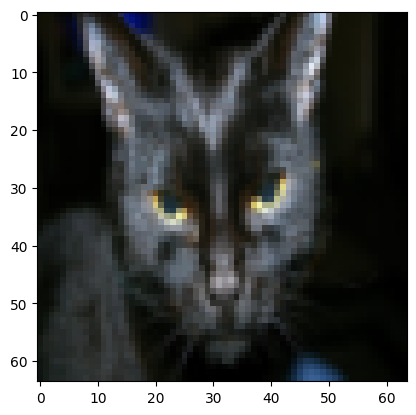

In [6]:
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

## Preprocessing

We studied that Logistic Regression only takes column vectors as input, however, the pictures we have three dimensions (width, height, color). To fix this we are going to flatten the pictures and make them as 1D array where the vector length is equal to $width \times height \times color$. In our case, $64\times64\times3=12288$

first we will save the some dimensions as we might use them later.

In [7]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig[0].shape[0]

here we will flatten the array into the shape (12288, num_examples) where each column represents an example

In [8]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
print(train_set_x_flatten.shape)

(12288, 209)


In [9]:
train_set_x_flatten[0]

array([ 17, 196,  82,   1,   9,  84,  56,  19,  63,  23, 188,   4, 154,
        17,  72, 245, 253, 217, 140,   2,   5,  17, 164, 156, 122,  15,
        78,  36,  14, 180,  39, 190, 233, 129, 137,  26,  23,  94,  63,
       113, 119,   1,  63, 255,  61,   0,  64,  51,  21,  57, 164, 152,
       106,  40,  15, 255,  31, 141,  52,  75,  81, 125,  99,  94,   2,
        86, 226,  76, 139,  43,  24,   7,  13, 103,  85, 110,  25,  61,
        34,  27, 176, 187,  26, 252,  96,  25,  34,  60, 123,  45,  99,
        49,  26, 154, 141,  62, 152, 194, 113,  57, 172,  70,  22, 142,
        37, 127, 172, 122, 110,  75, 165, 174,   5, 166, 144, 196,   2,
        64, 190, 170,  86, 106, 198,  70, 171,   9,  50,  84, 161,  23,
        79, 228, 104,   1,   5, 255, 142, 196, 135,  89,   0, 188, 255,
        17,  31, 169, 136,  79, 130, 150, 251,   7,  45, 159,  10, 135,
        32,  30, 140,  29,  29, 110,  99, 242, 158,  30, 240,  84,  10,
        93, 200, 190, 133,  74,  25,   3, 106, 133,  12, 105, 23

A weight or coefficient will be assigned for each one of these pixels  in the logistic regression function. It is like giving important for each importance for each pixel. Thus we will have 12288 elements in the weight vector.


### Feature Scaling

Feature scaling is a crucial preprocessing step in many machine learning algorithms. It involves transforming the data so that its features have similar scales or ranges. Here's why we do feature scaling:

1. Avoiding dominance of certain features: In algorithms that involve distance calculations or gradient descent optimization (such as K-Nearest Neighbors, Support Vector Machines, and Neural Networks), features with larger scales may dominate those with smaller scales. Feature scaling ensures that all features contribute equally to the analysis.

2. Improving convergence speed: Algorithms like Gradient Descent converge faster when features are on similar scales. Without feature scaling, the optimization process might take longer to reach the minimum or may oscillate around the minimum.

3. Preventing numerical instability: Some algorithms, particularly those based on matrix operations, are sensitive to large values. Feature scaling helps prevent numerical instability and ensures that these algorithms perform optimally.

For gradient descent it also helps avoid the vanishing gradients problem. If we look at the graph of the logistic function, the plot becomes almost flat after $x=5$ and $x=-5$, thus the change is minimal and the gradient becomes too small, thus vanishing. And if we look at the pixel values, most of them are way beyond 5, thus the gradients might be almost zero when working with these values and thus the algorithm might not converge. We can see that the graph changes mostly between -1 and 1, so we can scale the values to be within this range. Experts recommend to keep the features that range from 0 to some number (0 to 255 in our case), to keep the range starting from 0. So we will scale the values to be in range 0 to 1

In [10]:
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

## The logistic Regression Model

### Logistic Function

Define the logistic function:

$$ \sigma(t) = \frac{1}{1 + \exp^{-t}} $$

In [11]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    return 1 / (1+np.exp(-z))


### Initializing the Weights

Initialize the weights of the model to zeros. This is a bad practice when dealing with neural networks, but we will not bother with that for now.

In [12]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """
    
    w = np.zeros((dim, 1))
    b = 0.0

    return w, b

### Forward Propagation

for a single sample the result of the forward propagation is:
$y_i = \sigma(w.x_i + b), where \ w, x_i, y_i$ are all column vectors

Linear algebra helps us speed the algorithm by using the interesting property of matrix multiplication. For each row in the first matrix, we do a dot product with all the columns of the 2nd matrix. So if we transpose $w$ in to a row vector and matrix multiply it by the matrix $X$ containing the training examples aligned vertically, we will be able to do the calculations of all the samples in one forward propagation and utilize the parallelism of the PC to do the calculation in parallel, making the process much faster.

- $w^T$ has dimensions (number of features, 1)
- $X$ has dimensions (number of features, number of samples)
- $w^T.X$ will have dimensions (1, number of samples), i.e., a vector of scalars representing the probability for each sample

Propagate forward in the logistic regression model by:

1. Calculate the probability of each sample being positive label using $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
2. Calculate the cost function using $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$
3. Calculate the gradients of the weights and bias using:
   $$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [13]:
def propagate(w, b, X, Y):
    """
    Implements the cost function and its gradient

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    grads -- dictionary containing the gradients of the weights and bias
            (dw -- gradient of the loss with respect to w, thus same shape as w)
            (db -- gradient of the loss with respect to b, thus same shape as b)
    cost -- negative log-likelihood cost for logistic regression
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1/m)*(np.sum(Y*np.log(A) + (1-Y)*np.log(1-A)))

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1/m) * (np.dot(X, (A-Y).T))
    db = (1/m) * np.sum(A-Y)
    
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

### Optimization

Optimize the model by calculating the new weights and bias using the update rule:

  $$ b = b -  \alpha \frac{\partial J}{\partial b} \\[10pt]
   w = w -  \alpha \frac{\partial J}{\partial w} $$

In [14]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):

        grads, cost = propagate(w, b, X, Y)
 
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        w -= learning_rate*dw
        b -= learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

### Make the prediction

Make the predictions by calculating $A$ and setting the predicted value to 0 or 1 depending on this piece-wise function:

The final prediction
$$
\text{Predicted label} = \hat{y} = \begin{cases}
    1 & \text{if } a_i \geq 0.5 \\
    0 & \text{otherwise}
\end{cases}
$$

In [15]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities
    A = sigmoid(np.dot(w.T, X) + b)  
    
    for i in range(A.shape[1]):
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
        
    
    return Y_prediction

### Build the model

Group all the steps into a model and train it

In [16]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """  
    
    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent 
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "params"
    w = params['w']
    b = params['b']

    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [27]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=500, learning_rate=0.01, print_cost=True)

Cost after iteration 0: 0.693147


Cost after iteration 100: 0.823921
Cost after iteration 200: 0.418944
Cost after iteration 300: 0.617350
Cost after iteration 400: 0.522116
train accuracy: 83.25358851674642 %
test accuracy: 82.0 %


y = 1, you predicted that it is a "cat" picture.


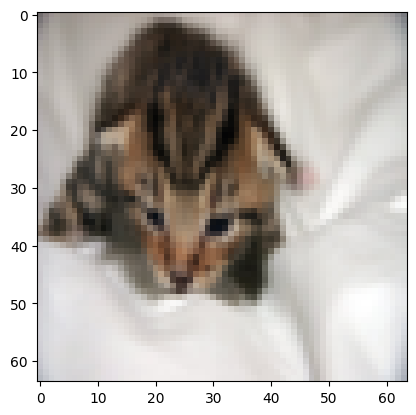

In [28]:
index = 1
plt.imshow((test_set_x[:, index].reshape((num_px, num_px, 3))*255).astype(np.uint8))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

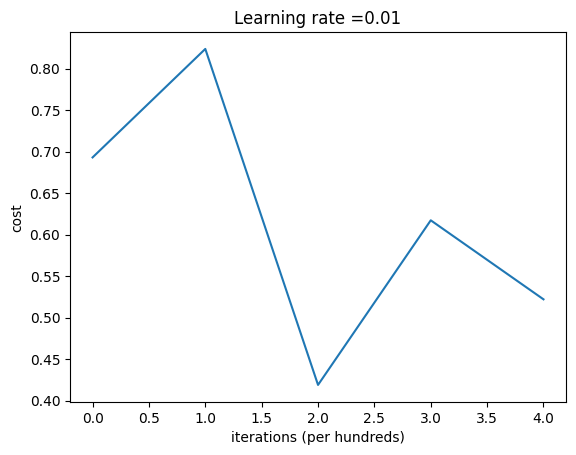

In [29]:
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

## Testing

Get a cat pic, import it then do the same preprocessing that we did to the dataset. Use the weights and bias from the logistic model that we trained then use the predict method to see if the model will output a correct prediction or not.

hint: you can use pillow Image objects to load the image

y = 1.0, your model predicts a "cat" picture.


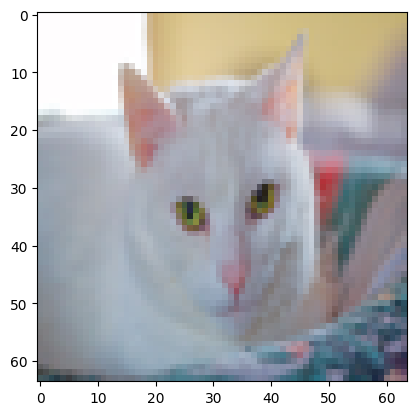

In [30]:
from PIL import Image

my_image = "images\my_image.jpg"
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)

image = np.array(Image.open(my_image).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model['w'], logistic_regression_model['b'], np.array(image))

print("y = " + str(np.squeeze(my_predicted_image)) + ", your model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")